In [18]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sbn
import time
import matplotlib.dates as mdates
import matplotlib as mpl
import ast
import datetime
from tqdm import tqdm
import glob

#import modules
from src.data.helper_closed_transactions import read_epex_file, filter_lead_time, extract_transactions
from src.visualization.visualize_transactions_complete import executed_transactions_bar_chart, executed_transactions_heatmap_summary, executed_transactions_time_series

from src.data.bid_ask_spread import hourly_bid_ask_spread, update_prices_closed_transactions_complete, hourly_bid_ask_spread_depth
from src.visualization.visualize_bid_ask_spread import hourly_bid_ask_spread_plot, hourly_bid_ask_spread_plot_comparison

#set maximum columns display pandas
pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Obtained 12 months statistics

In [2]:
df_summary=pd.read_csv('../data/processed/summary_analysis_complete_window_interest_2019_21-04-2021 21:54:04/2019_21-04-2021 21:54:04_summary.csv')

Closed Number of Transactions Statistics

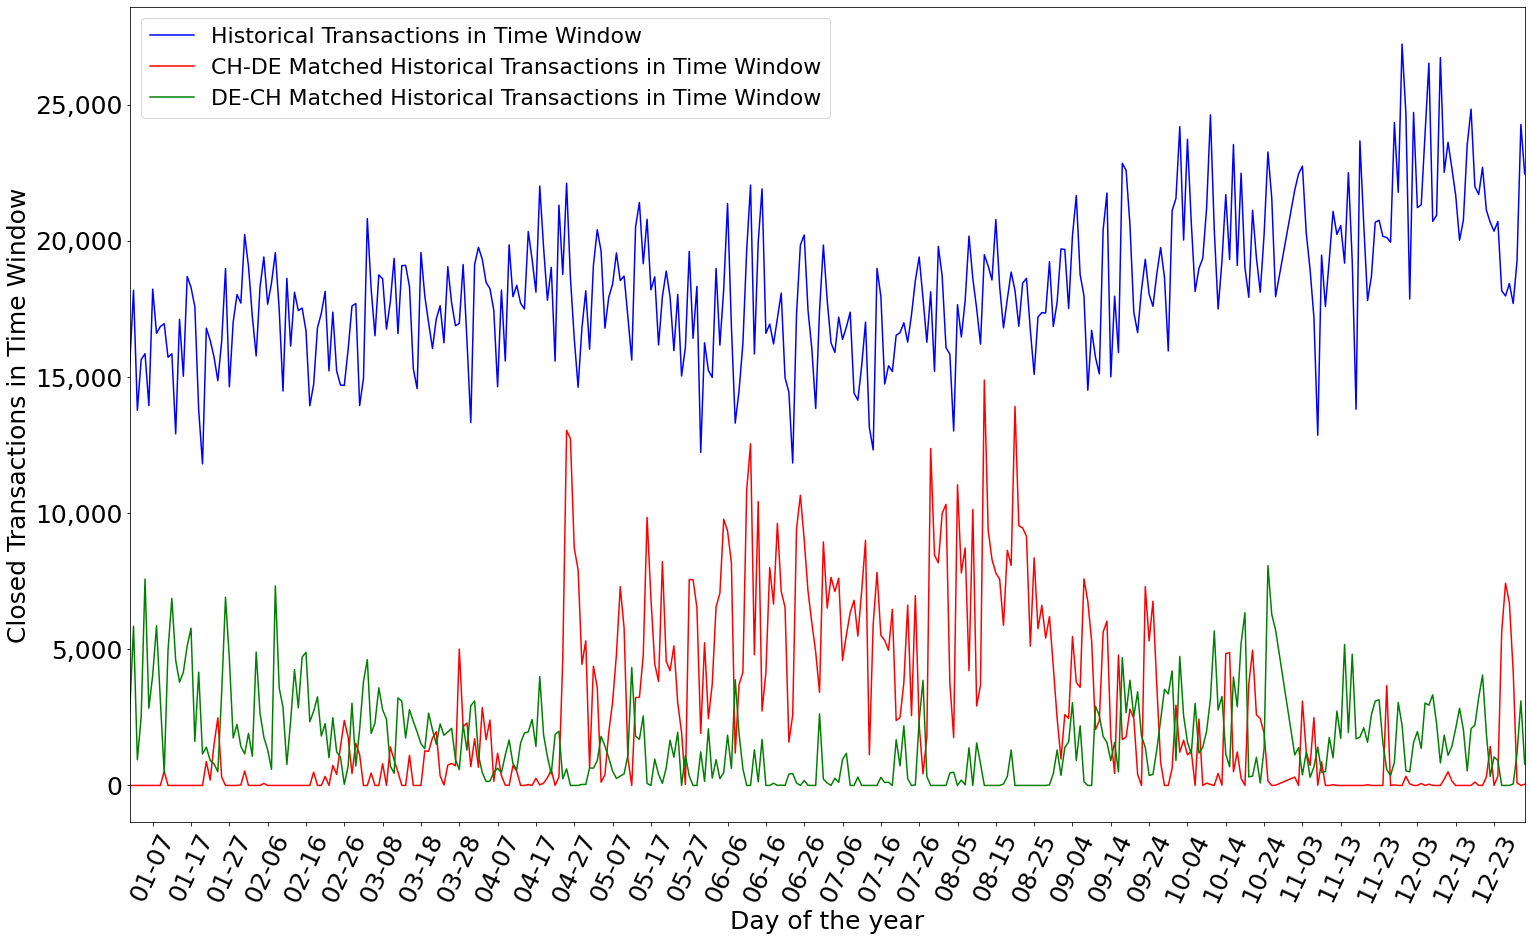

In [20]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Number of Contracts Closed'],
       color='blue',
       label='Historical Transactions in Time Window')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['CH-DE Additional Contracts Closed'],
       color='red',
       label='CH-DE Matched Historical Transactions in Time Window')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['DE-CH Additional Contracts Closed'],
       color='green',
       label='DE-CH Matched Historical Transactions in Time Window')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Closed Transactions in Time Window', size=25)


ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.xaxis.set_tick_params(rotation=65)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Additional Income CH Suppliers deriving from CH-DE turbining activity

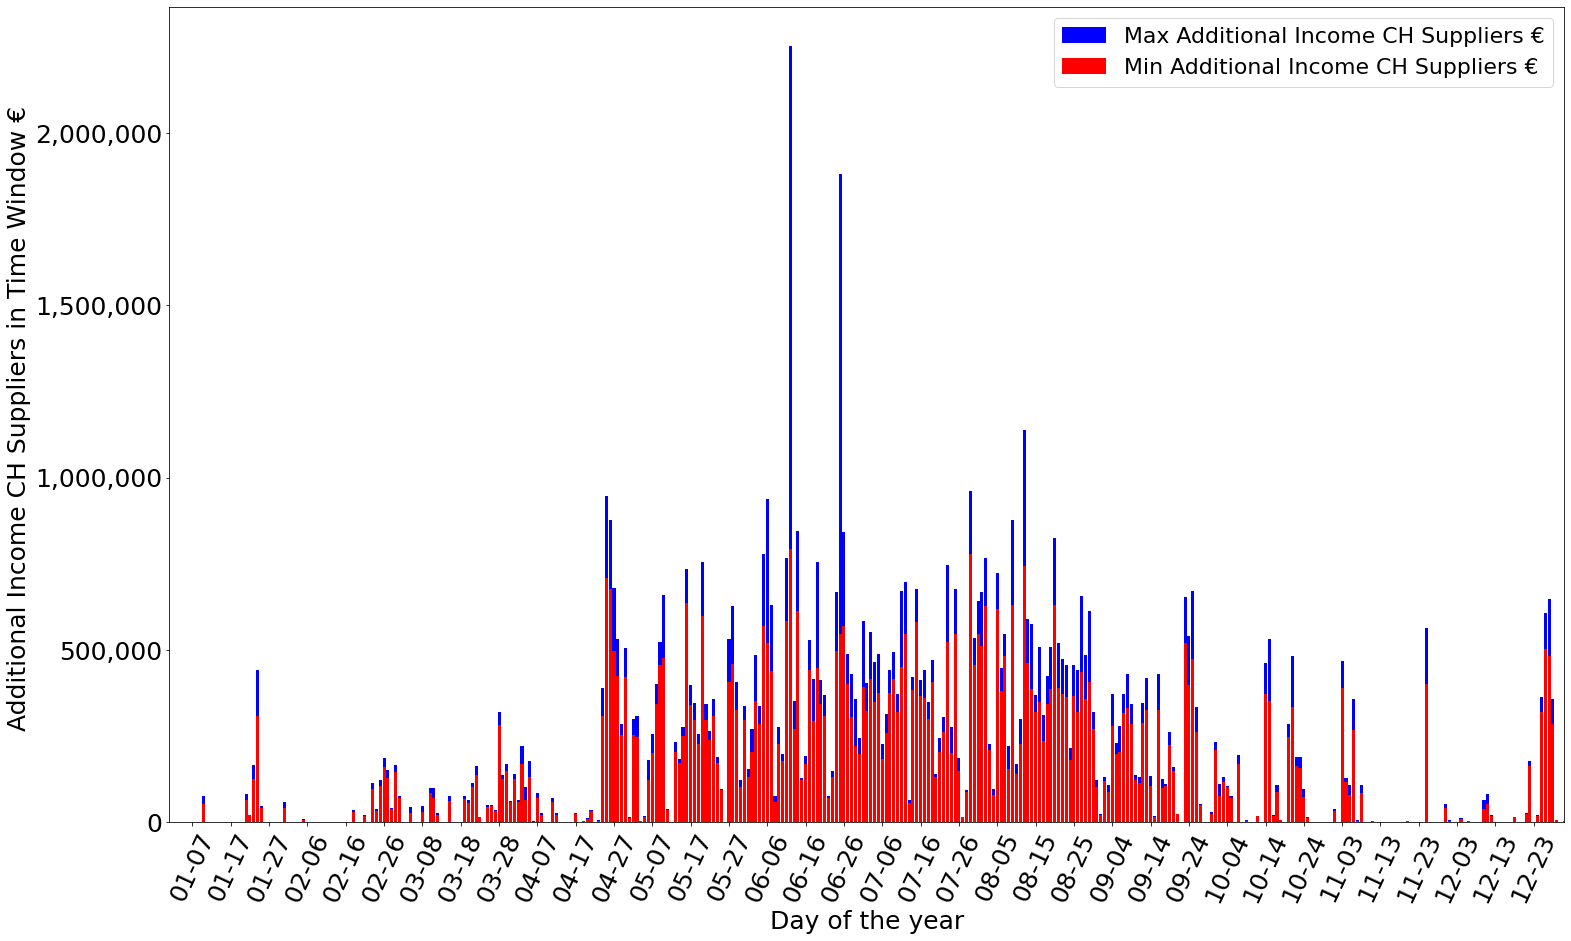

In [3]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']), 
       df_summary['CH-DE Revenue Max'], 
       color='blue',
       label='Max Additional Income CH Suppliers €')

ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['CH-DE Revenue Min'], 
       color='red',
       label='Min Additional Income CH Suppliers €')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Additional Income CH Suppliers in Time Window € ', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Additional Income DE Suppliers or CH Buyers from DE-CH pumping activity

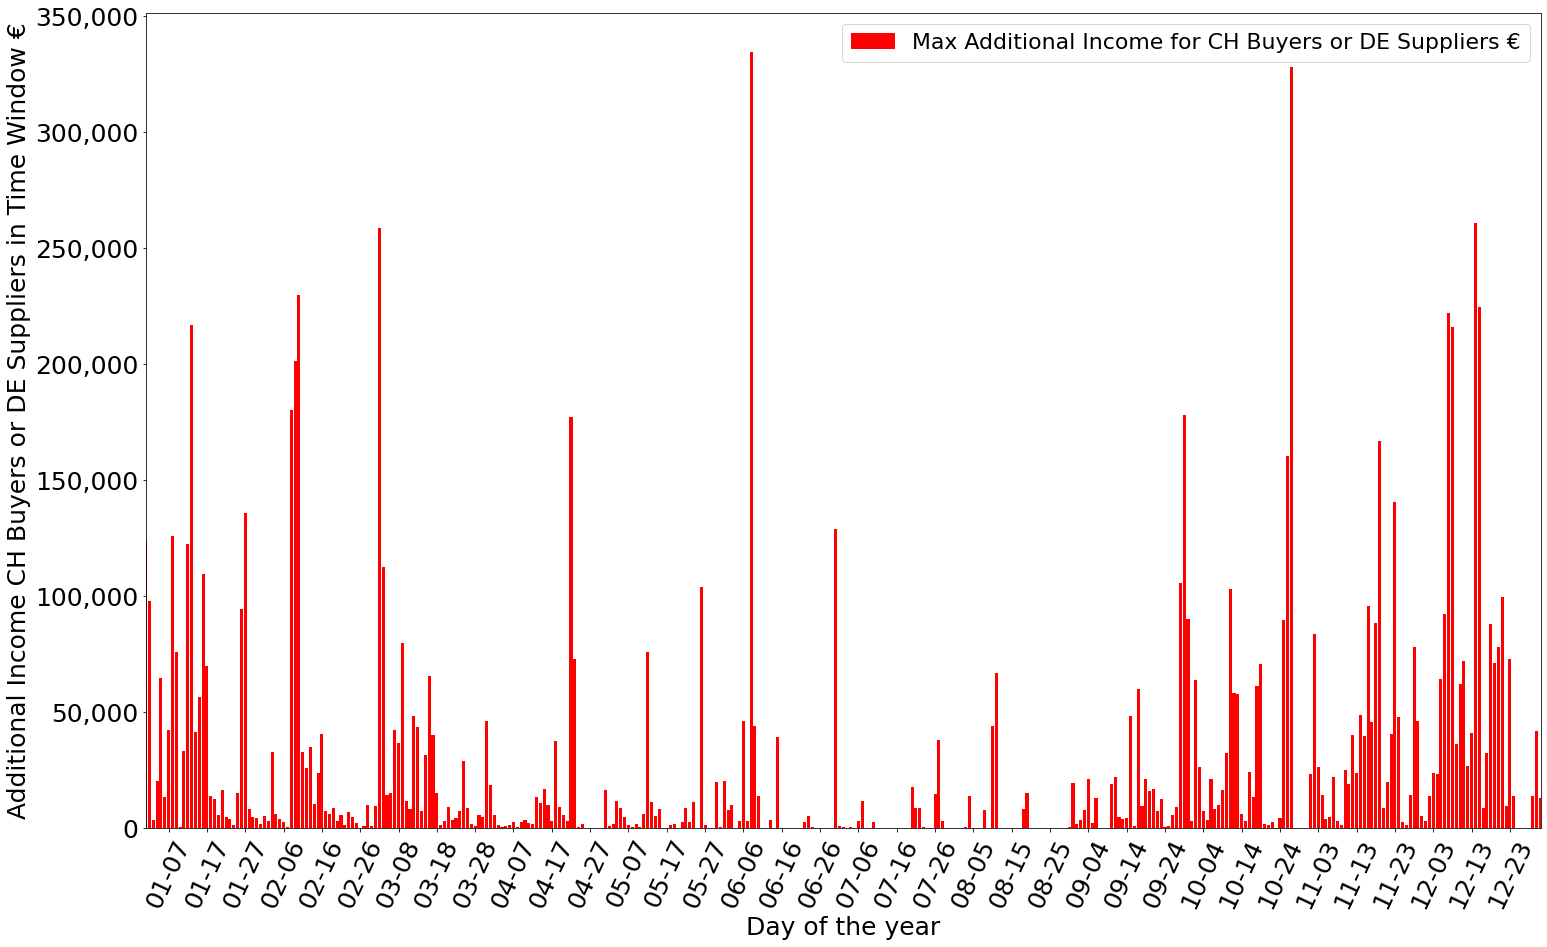

In [18]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['DE-CH Revenue Min']-df_summary['DE-CH Revenue Max'], 
       color='red',
       label='Max Additional Income for CH Buyers or DE Suppliers €')




ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Additional Income CH Buyers or DE Suppliers in Time Window €', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Difference between historical DE Suppliers income and a-posteriori income from DE-CH pumping activity

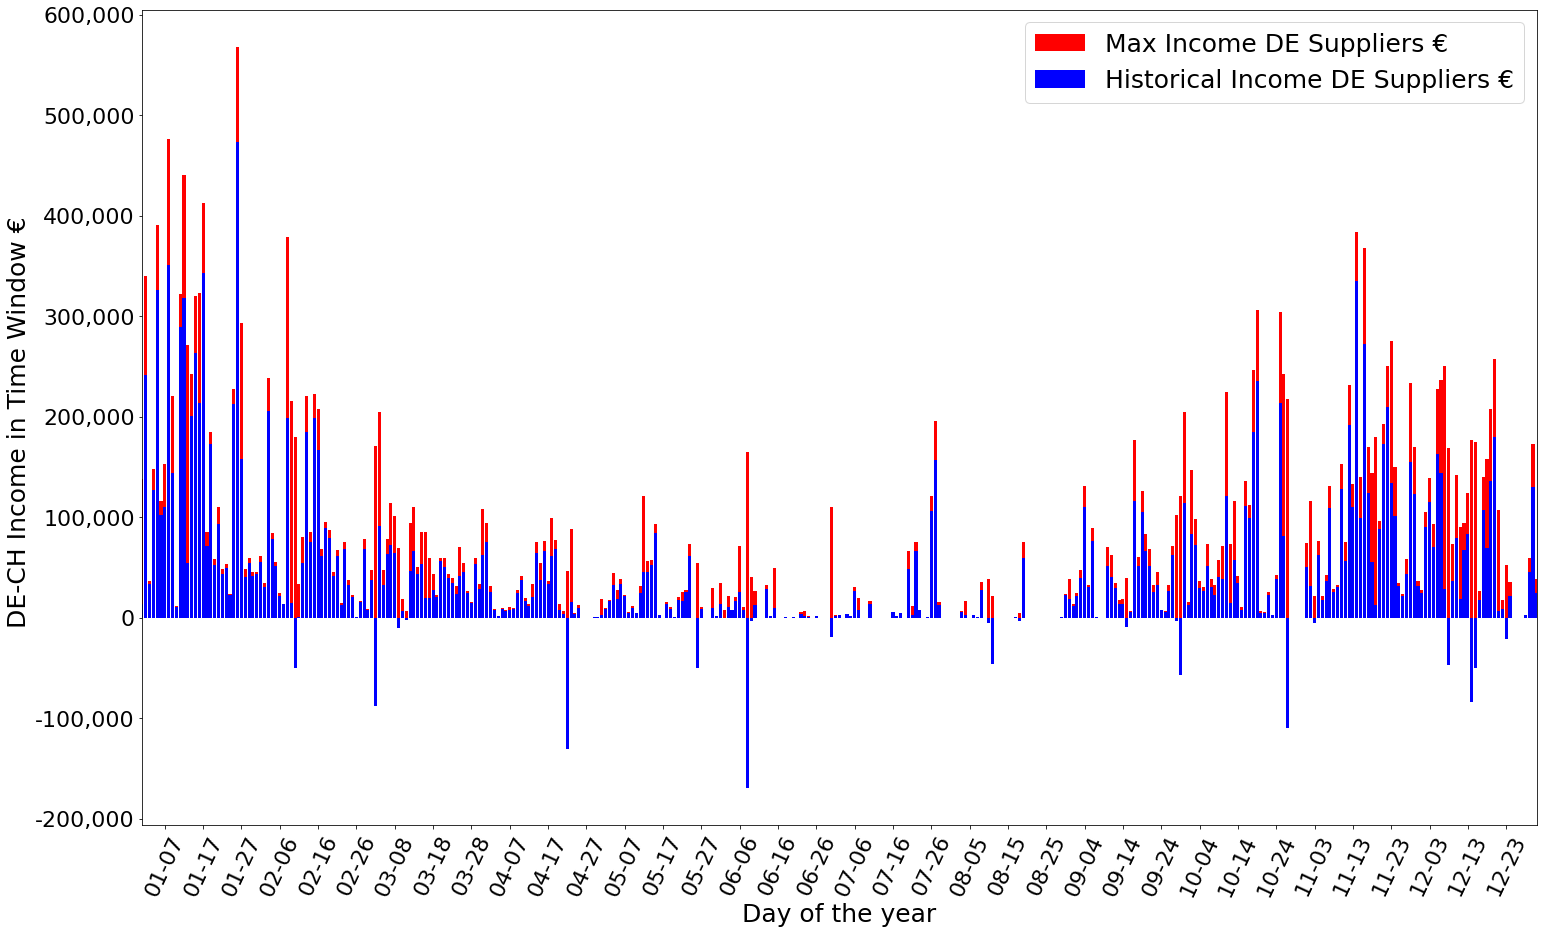

In [22]:
# plot-
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['DE-CH Revenue Min'], 
       color='red',
       label='Max Income DE Suppliers €')
ax.bar(pd.to_datetime(df_summary['time']), 
       df_summary['DE-CH Revenue Max'], 
       color='blue',
       label='Historical Income DE Suppliers €')



ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('DE-CH Income in Time Window € ', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=22)

Transactions volumes

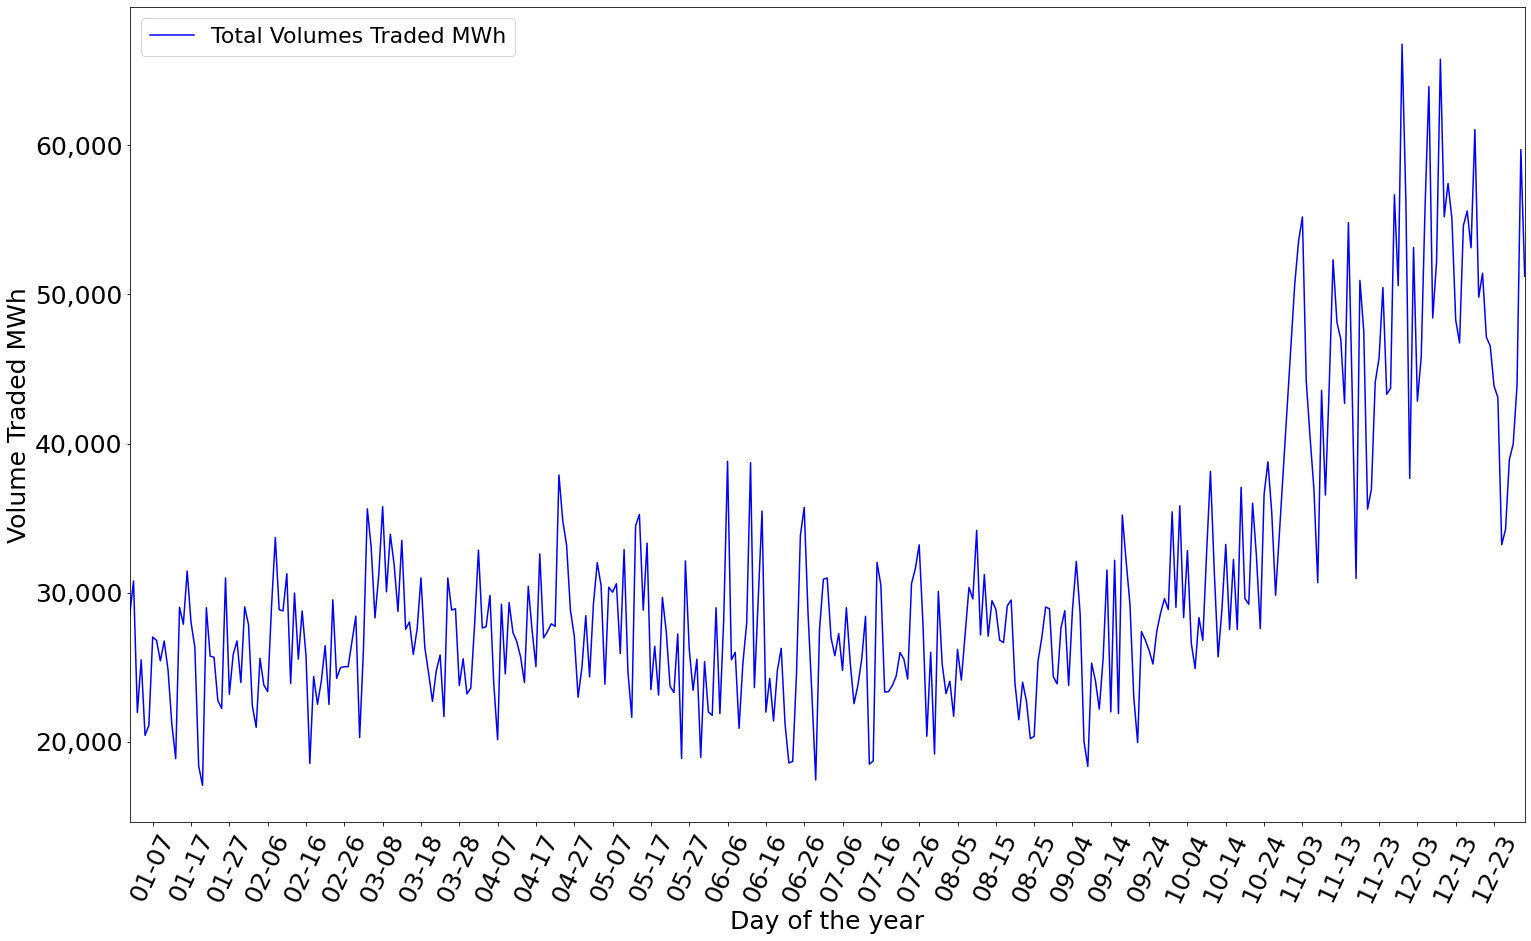

In [3]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Total Volume Traded'], 
       color='blue',
       label='Total Volumes Traded MWh')


ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Volume Traded MWh', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

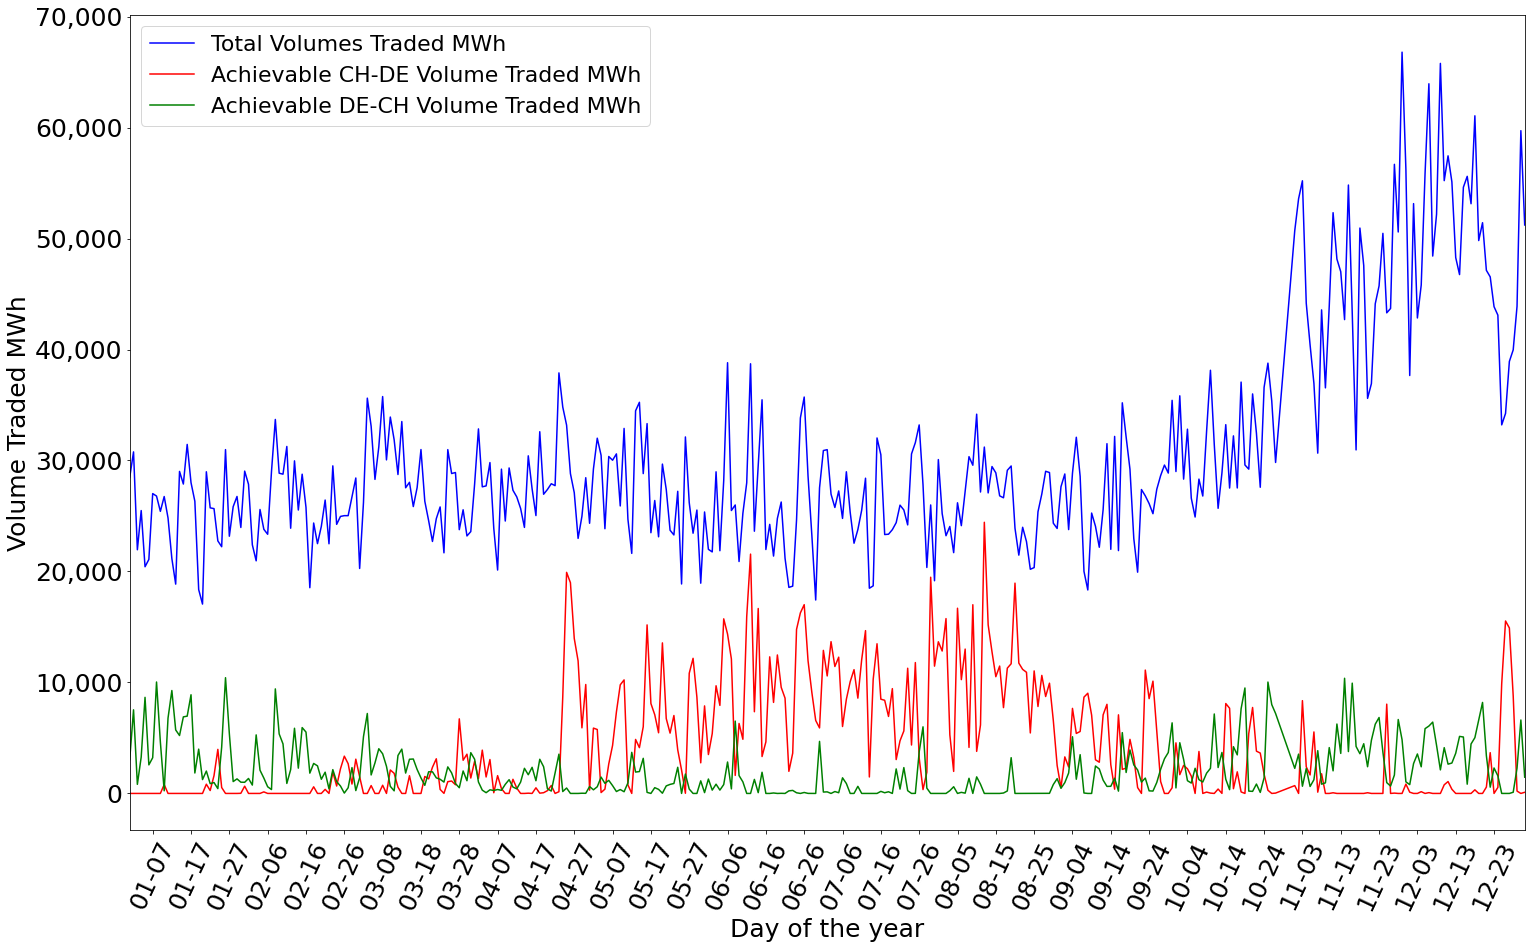

In [4]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Total Volume Traded'], 
       color='blue',
       label='Total Volumes Traded MWh')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Total Volume Traded CH-DE'], 
       color='red',
       label='Achievable CH-DE Volume Traded MWh')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Total Volume Traded DE-CH'], 
       color='green',
       label='Achievable DE-CH Volume Traded MWh')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Volume Traded MWh', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Hours contracts closed distribution

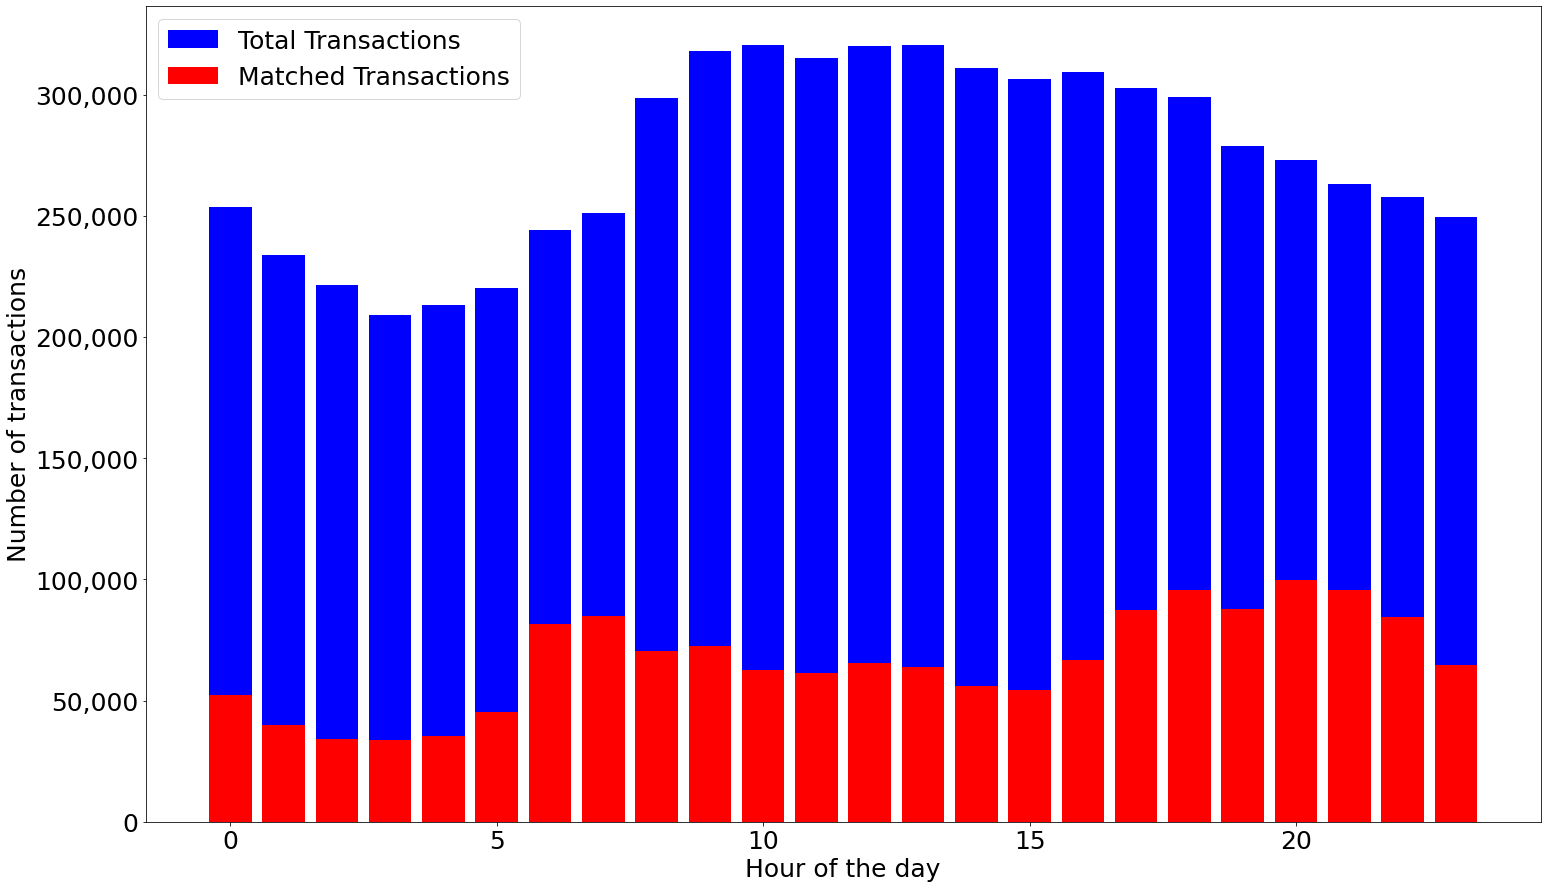

In [28]:
for i in range(df_summary['Hours Count'].shape[0]):
    
    if i==0:
        
        a= ast.literal_eval(df_summary['Hours Count'].iloc[i])  
        
    if i>0:
        
        b=ast.literal_eval(df_summary['Hours Count'].iloc[i])
        
        a={k: a.get(k, 0) + b.get(k, 0) for k in set(a) | set(b)}
        
for i in range(df_summary['Hours Match Count'].shape[0]):
    
    if i==0:
        
        c= ast.literal_eval(df_summary['Hours Match Count'].iloc[i])  
        
    if i>0:
        
        z=ast.literal_eval(df_summary['Hours Match Count'].iloc[i])
        
        c={k: c.get(k, 0) + z.get(k, 0) for k in set(c) | set(z)}

#plot
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(a.keys(), 
       a.values(), 
       color='blue',
       label='Total Transactions')

ax.bar(c.keys(), 
       c.values(), 
       color='red',
       label='Matched Transactions')


ax.set_xlabel('Hour of the day', size=25)
ax.set_ylabel('Number of transactions', size=25)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

Hours contracts closed volume distribution

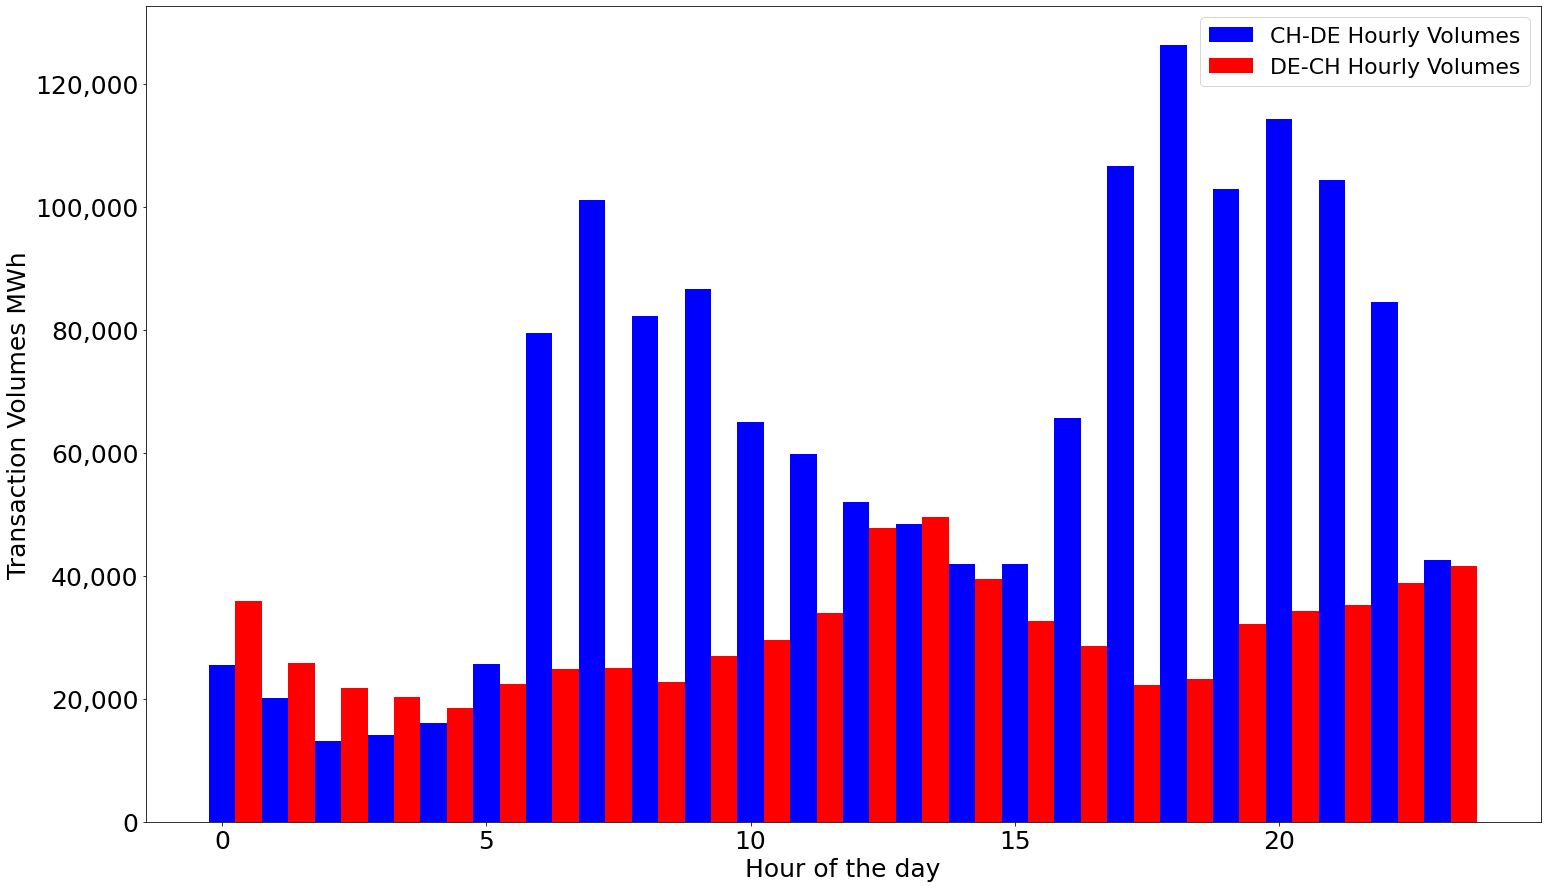

In [30]:
for i in range(df_summary['Hours Volume CH-DE'].shape[0]):
    
    if i==0:
        
        a= ast.literal_eval(df_summary['Hours Volume CH-DE'].iloc[i])  
        
    if i>0:
        
        b=ast.literal_eval(df_summary['Hours Volume CH-DE'].iloc[i])
        
        a={k: a.get(k, 0) + b.get(k, 0) for k in set(a) | set(b)}
        
for i in range(df_summary['Hours Volume DE-CH'].shape[0]):
    
    if i==0:
        
        c= ast.literal_eval(df_summary['Hours Volume DE-CH'].iloc[i])  
        
    if i>0:
        
        z=ast.literal_eval(df_summary['Hours Volume DE-CH'].iloc[i])
        
        c={k: c.get(k, 0) + z.get(k, 0) for k in set(c) | set(z)}

#plot
width = 0.5 
width_list = []
for i in range(24): 
    width_list.append(width)

fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(a.keys(), 
       a.values(),width,
       color='blue',
       label='CH-DE Hourly Volumes')

ax.bar([x + y for x, y in zip(list(c.keys()), width_list)], 
       c.values(),width,  
       color='red',
       label='DE-CH Hourly Volumes')


ax.set_xlabel('Hour of the day', size=25)
ax.set_ylabel('Transaction Volumes MWh', size=25)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Historical prices vs a posteriori prices derviving from CH-DE turbining activity

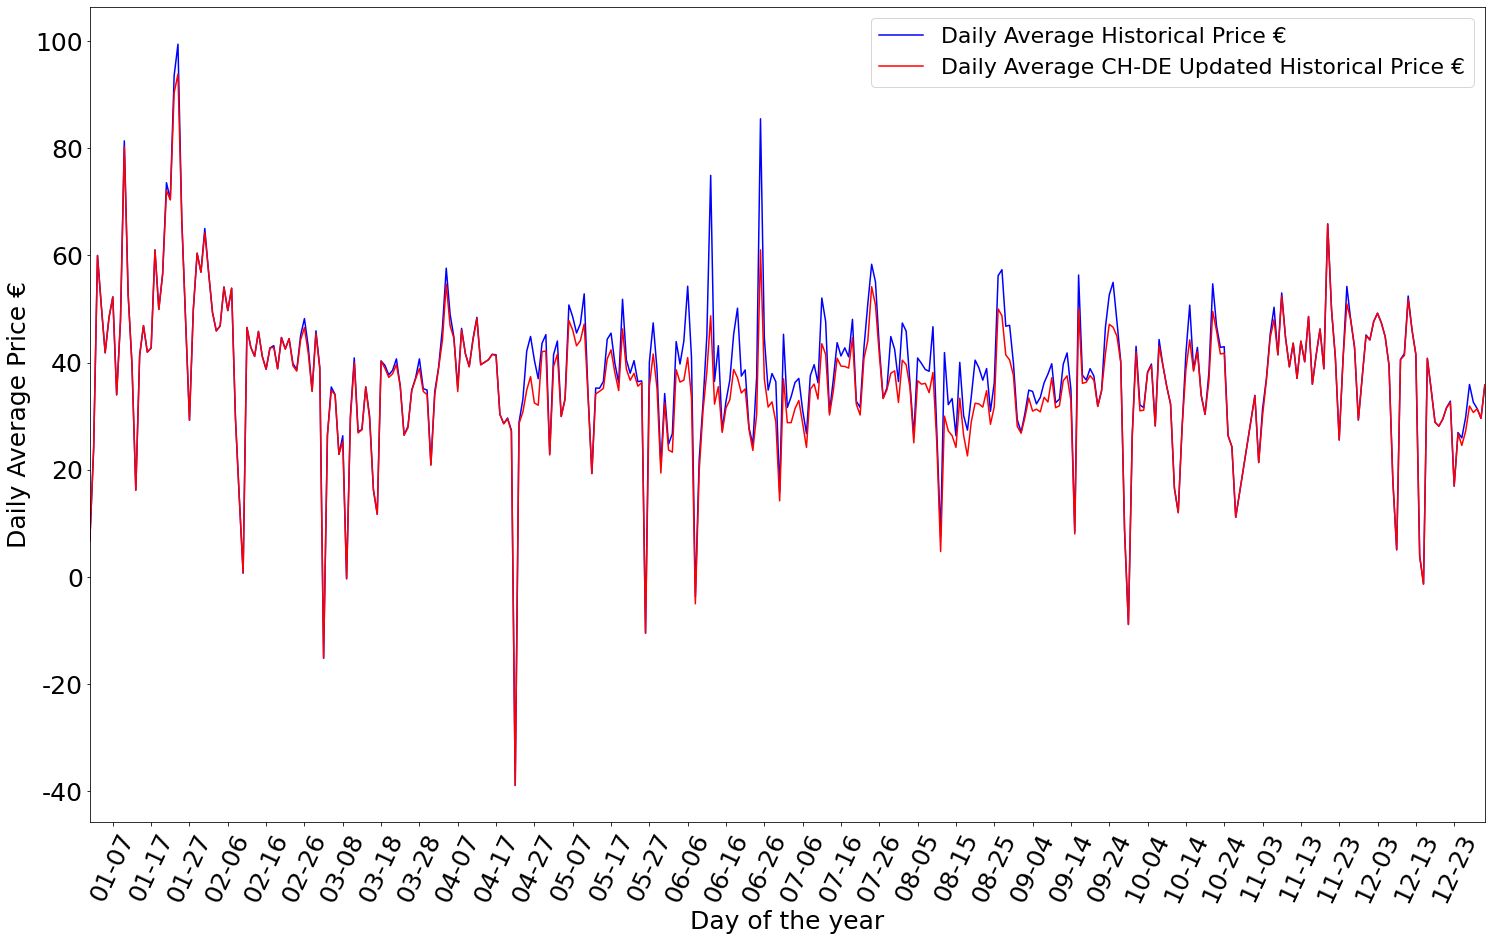

In [37]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Avg Historical Price'], 
       color='blue',
       label='Daily Average Historical Price €')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Avg a Posteriori Price CH-DE'], 
       color='red',
       label='Daily Average CH-DE Updated Historical Price €')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Daily Average Price €', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Historical prices vs a posteriori prices derviving from DE-CH pumping activity

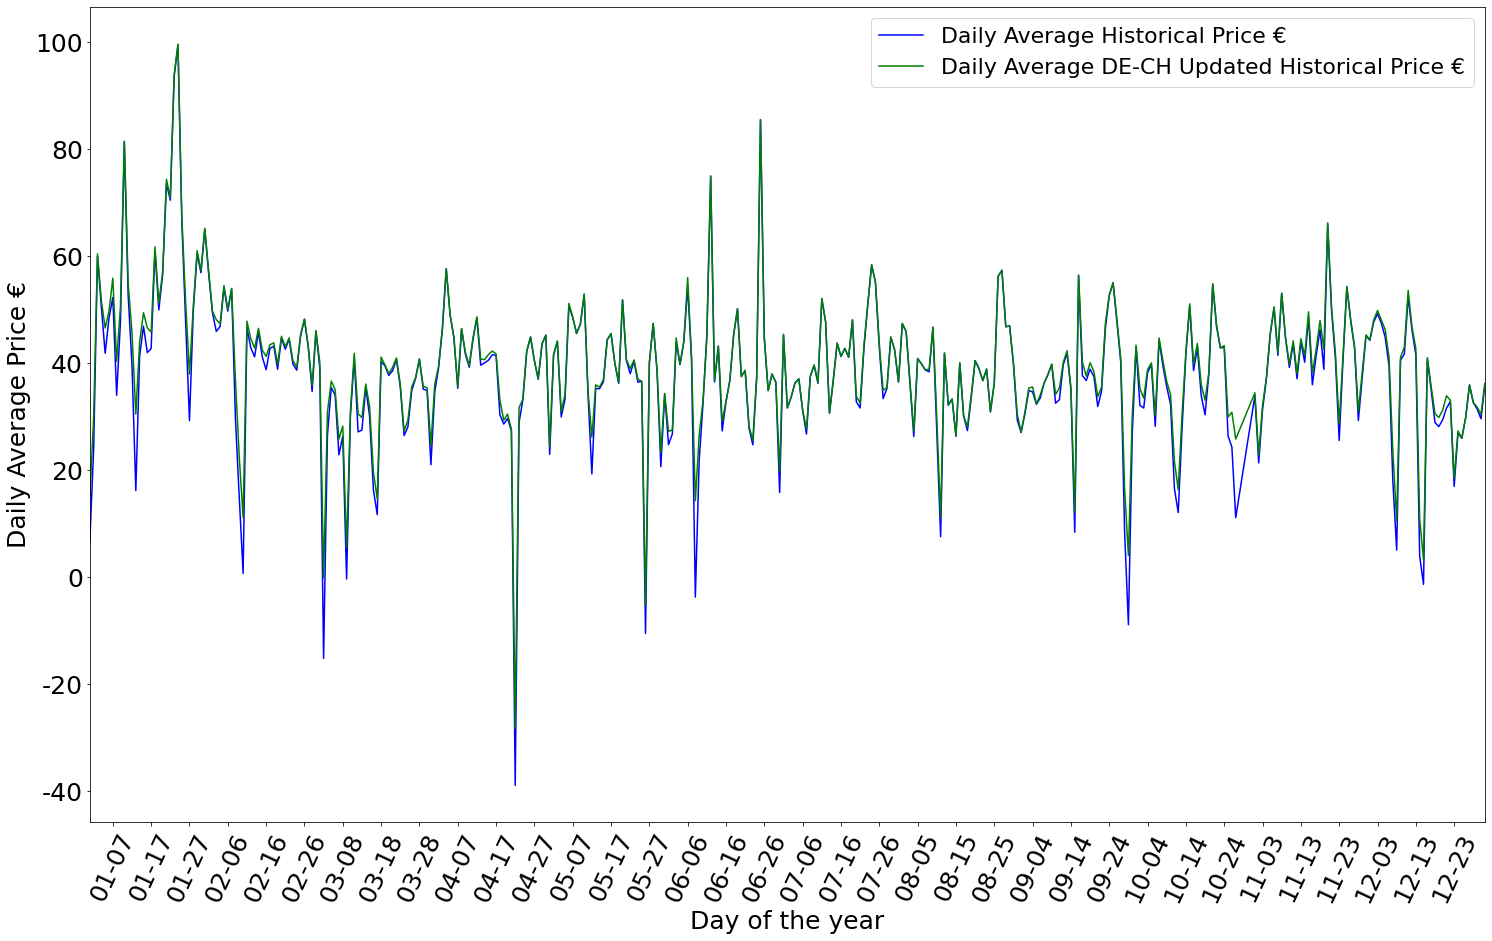

In [38]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Avg Historical Price'], 
       color='blue',
       label='Daily Average Historical Price €')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Avg a Posteriori Price DE-CH'], 
       color='green',
       label='Daily Average DE-CH Updated Historical Price €')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Daily Average Price €', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Historical prices vs a posteriori prices deriving from both CH-DE and DE-CH activities

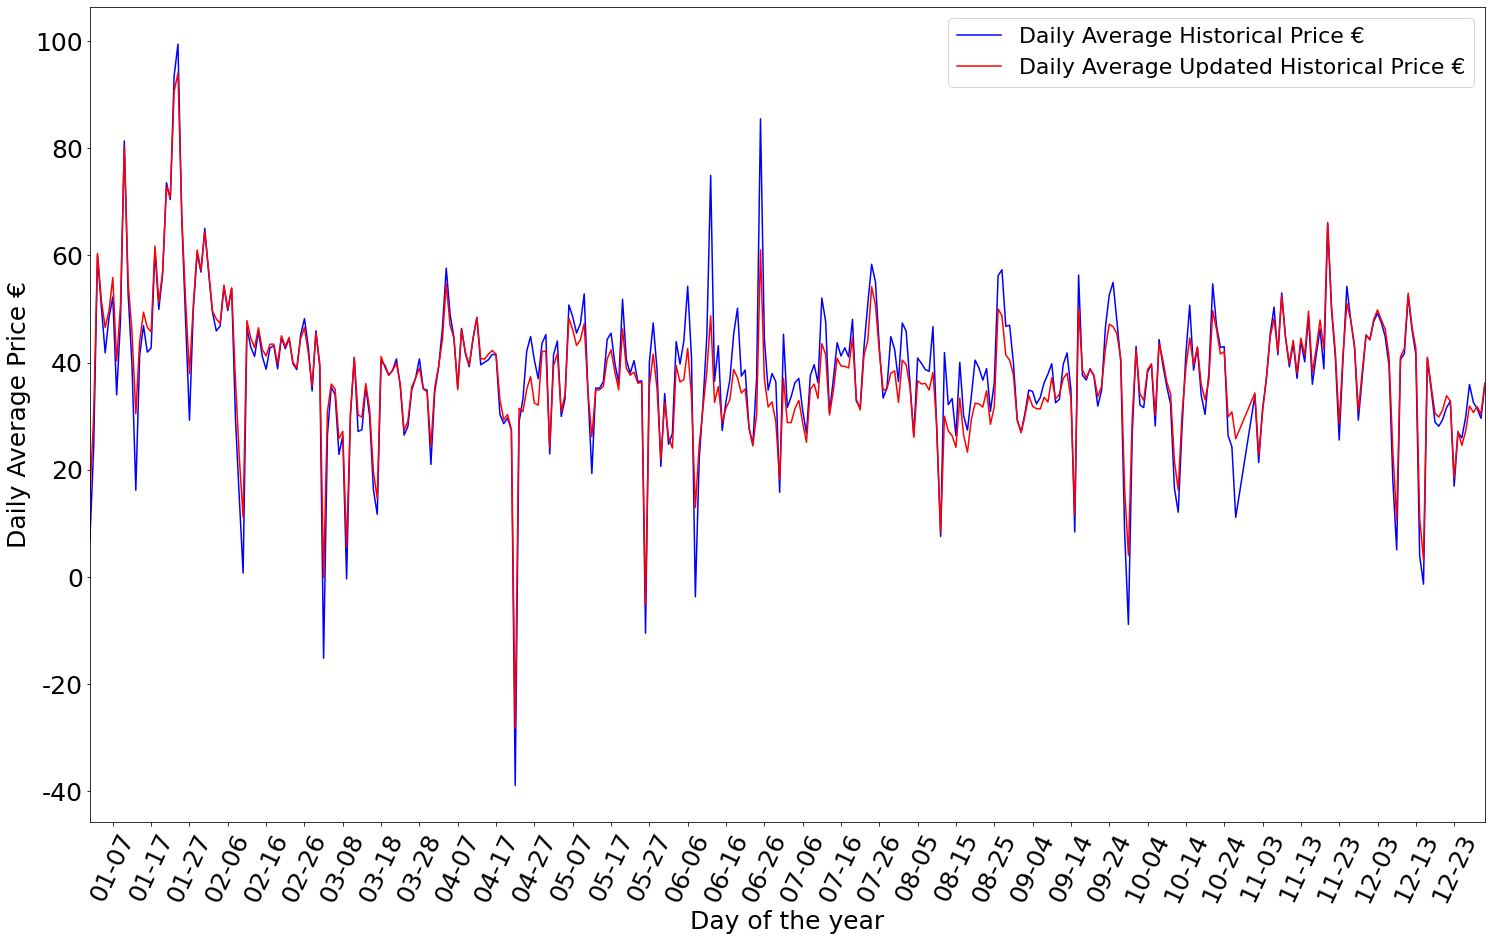

In [39]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Avg Historical Price'], 
       color='blue',
       label='Daily Average Historical Price €')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Avg a Posteriori Price'], 
       color='red',
       label='Daily Average Updated Historical Price €')

ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Daily Average Price €', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)


Maximum historical prices reduction deriving from both CH-DE and DE-CH activities

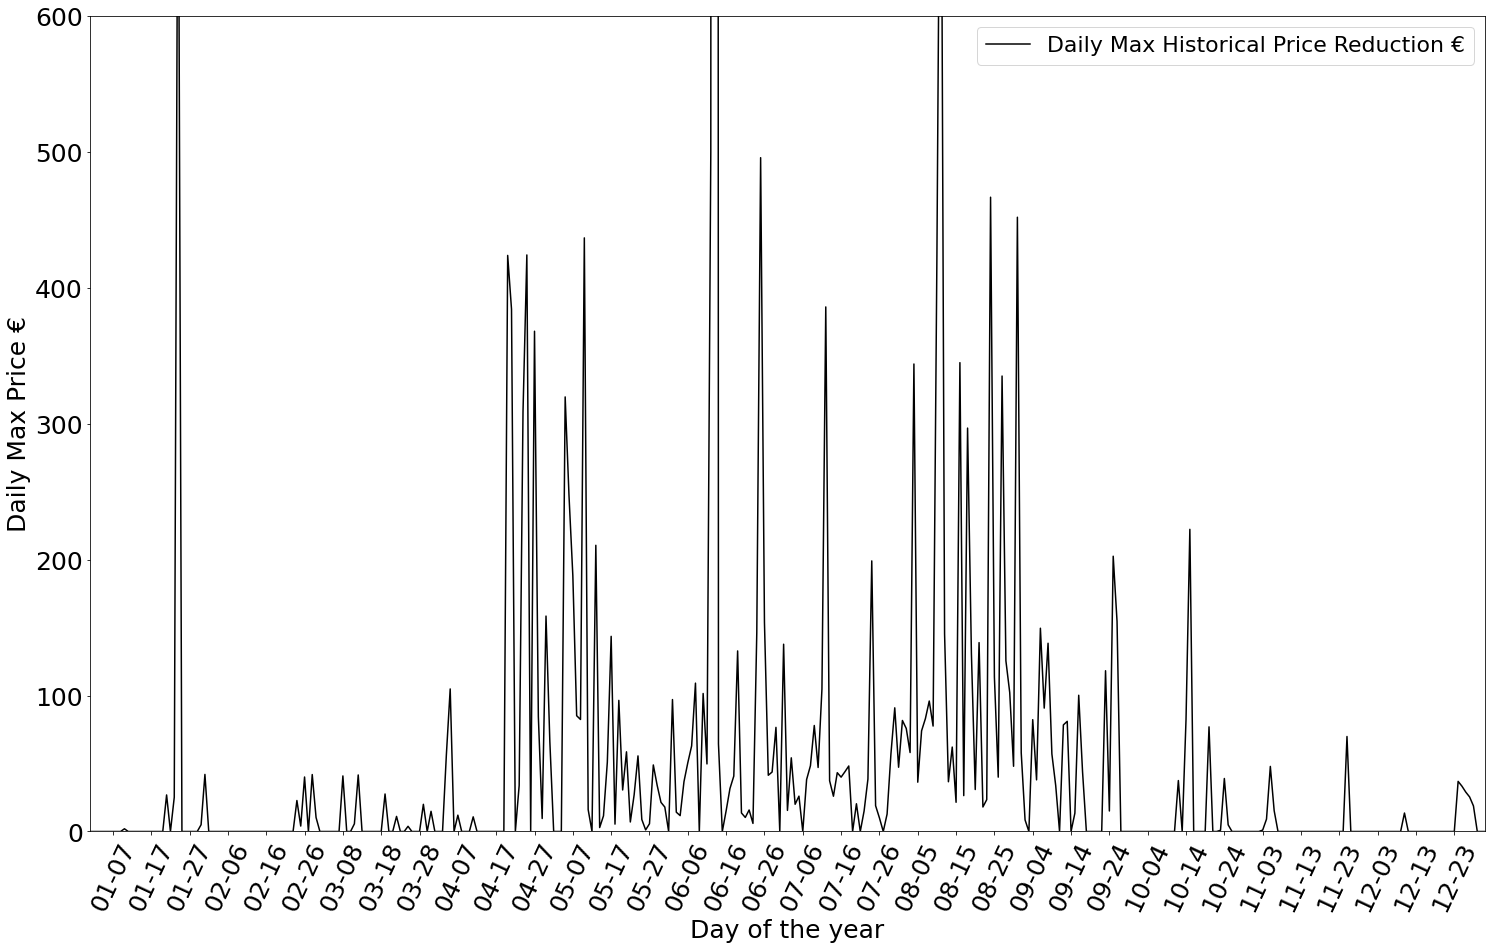

In [43]:
# plot
days = mdates.DayLocator(interval=10)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Max Historical Price']-df_summary['Max a Posteriori Price'], 
       color='black',
       label='Daily Max Historical Price Reduction €')


ax.set_xlabel('Day of the year', size=25)
ax.set_ylabel('Daily Max Price €', size=25)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])

ax.set_ylim([0,600])
ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

Load the daily data of the 24.04.2019

In [6]:
df=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-04/DE Continuous Orders 20190424.csv")


In [45]:
transactions=pd.read_csv('../data/interim/EPEX_spot_continous_complete_pipeline_2019_21-04-2021 21:54:04/2019-04/Transactions/DE_20190424.csv')


Lead time volume transactions distribution

In [11]:
s=df[(df['Is Executed']!=0) & (df['Side']=='B')]['lead_time'].dt.total_seconds()/60
ws=df[(df['Is Executed']!=0) & (df['Side']=='B')]['Executed Volume']

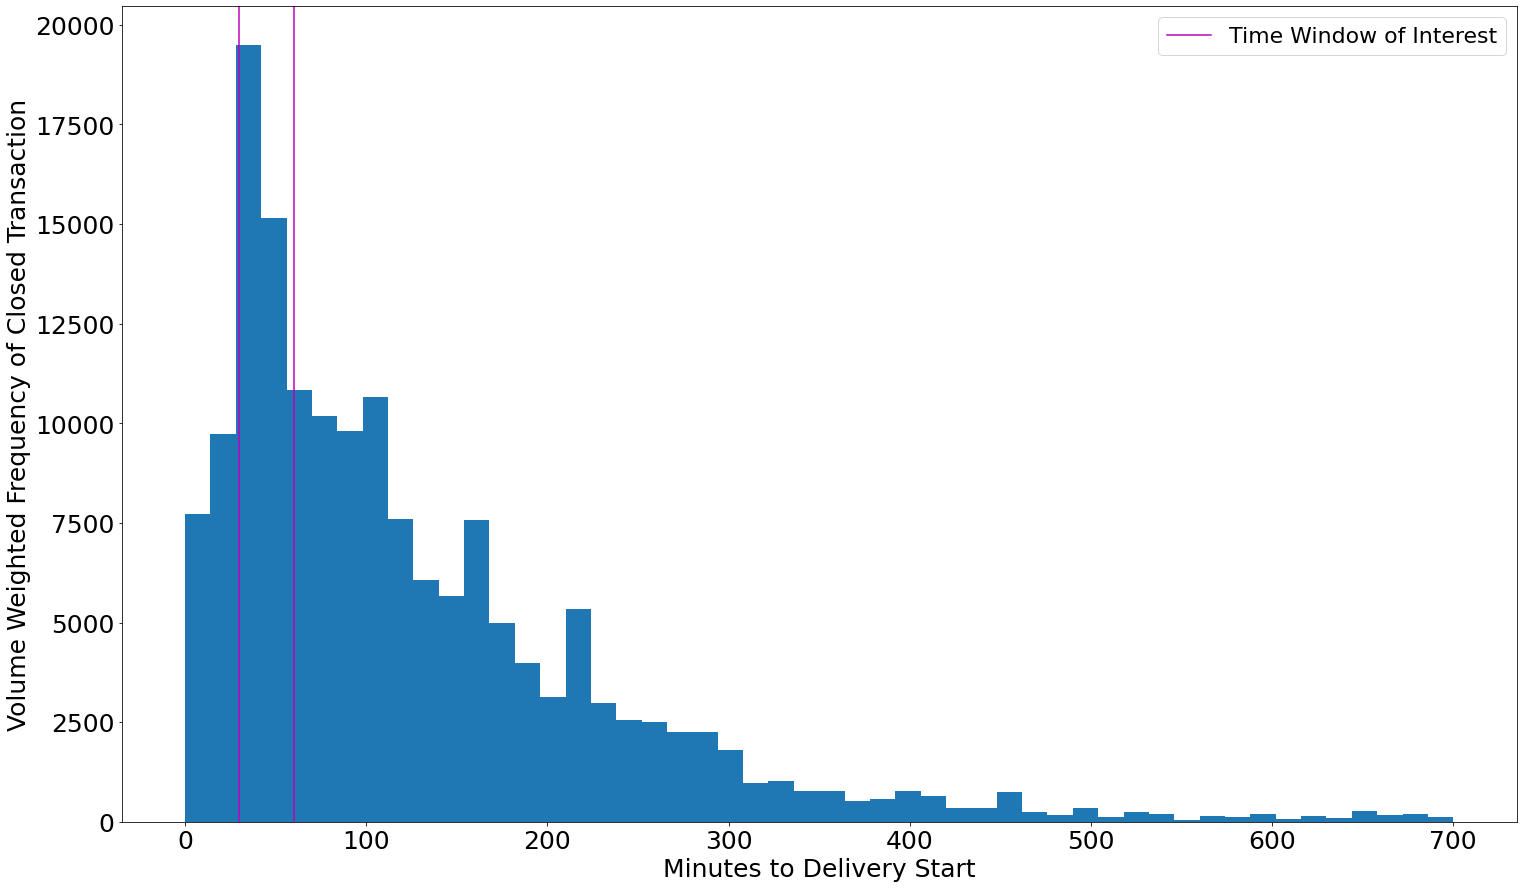

In [12]:
fig, ax = plt.subplots(figsize=(25, 15))
bins=ax.hist(s.values,
              weights=ws,
             range=(0, 700),
              bins=50)
plt.axvline(30, 0, 14000, c='m')
plt.axvline(60, 0, 14000, label='Time Window of Interest', c='m')

ax.set_xlabel('Minutes to Delivery Start', size=25)
ax.set_ylabel('Volume Weighted Frequency of Closed Transaction', size=25)

ax.legend(fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=25)

The total amounts of volume traded on this particular day in the window of interest amounts to 20% of the total daily volume.

In [51]:
time=df[(df['Is Executed']!=0) & (df['Side']=='B')]['lead_time'].dt.total_seconds()/60
df_volumes=df[(df['Is Executed']!=0) & (df['Side']=='B')]

In [56]:
d=dict(df_volumes.groupby(time)['Executed Volume'].sum())
volume_time_window=0
for key in d.keys():
    if key>30 and key<=60:
        volume_time_window=volume_time_window+d[key]

In [57]:
volume_time_window/df_volumes['Executed Volume'].sum()

0.21170268186839433

Total volume and lead time distribution for the whole year

In [28]:
folder_root_path='../data/external/EPEX_spot_continous_2019'
total_sum=0
for filepath in tqdm(glob.glob(folder_root_path+'/*/DE *.csv', recursive=True)):

    # obtain time and path of each file
    df_t=pd.read_csv(filepath,
                    sep=';',
                    decimal=",")
    
    total_sum=total_sum+df_t[(df_t['Is Executed']!=0) & (df_t['Side']=='B')]['Executed Volume'].sum()

100%|██████████| 300/300 [14:11<00:00,  2.84s/it]


In [29]:
total_sum

37894249.274999976

In [33]:
df_summary['Total Volume Traded'].sum()/total_sum

0.2911181033022327

Calculate the % of CH-DE and DE-CH volume traded of the total transaction volume in the time window.

In [31]:
(df_summary['Total Volume Traded CH-DE'].sum()+df_summary['Total Volume Traded DE-CH'].sum())/df_summary['Total Volume Traded'].sum()

0.20431186684591343

In [58]:
transactions_update=pd.read_csv('../data/processed/EPEX_spot_continous_complete_pipeline_2019_21-04-2021 21:54:04/2019-04/Updated Transactions/DE_20190424.csv')



Number of CH-DE closed transactions in window of intereset before and after hydro inclusion

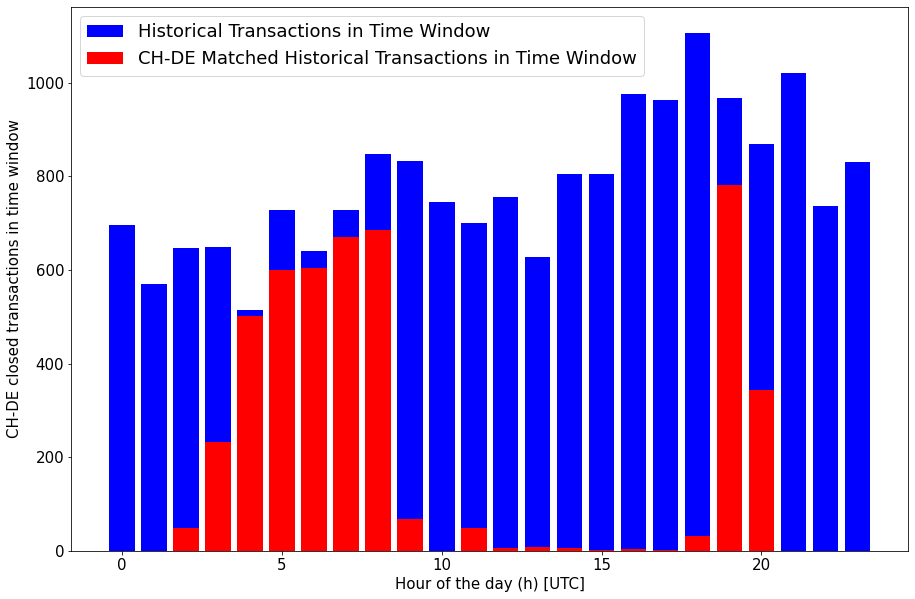

In [16]:
data_base, data_updated=executed_transactions_bar_chart(transactions_update,
                                                              plot=True,
                                                              return_updated_transactions=True,
                                                             side='CH-DE')



Number of DE-CH closed transactions in window of intereset before and after hydro inclusion

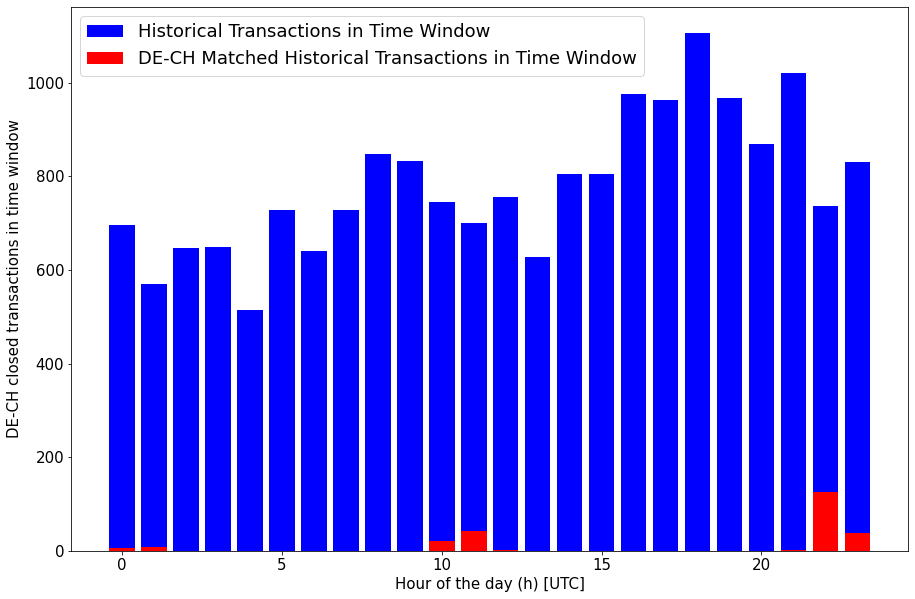

In [17]:
data_base, data_updated=executed_transactions_bar_chart(transactions_update,
                                                              plot=True,
                                                              return_updated_transactions=True,
                                                             side='DE-CH')




Volume Transactions during the day CH-DE (Dashboard)

<AxesSubplot:xlabel='Delivery Start'>

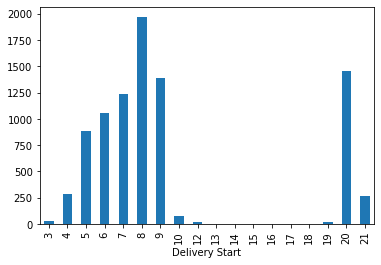

In [60]:
time=pd.to_datetime(transactions_update['Delivery Start'])
transactions_update[transactions_update['match_binary_outcome_selling']==1].groupby(time.dt.hour)['Executed Volume'].sum().plot(kind='bar')

Volume Transactions during the day DE-CH (Dashboard)

<AxesSubplot:xlabel='Delivery Start'>

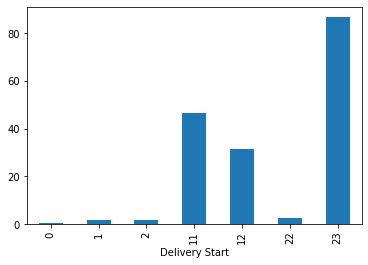

In [28]:
time=pd.to_datetime(transactions_update['Delivery Start'])
transactions_update[transactions_update['match_binary_outcome_pumping']==1].groupby(time.dt.hour)['Executed Volume'].sum().plot(kind='bar')

Visualize heat map of prices variation in the window of interest in the german market before and after Swiss hydro inclusion. The effect of pumping and turbining can be seen on the prices differently since turbining activity leads to a potential price fall in the German market, while pumping activity can cause a surge in prices in the German market. (Dashboard)

In [61]:
daily_execution_price_stat, daily_execution_volume_stat, daily_execution_price_stat_marginal=executed_transactions_heatmap_summary(transactions_update,
                                                                                                                                   plot=False,
                                                                                                                                   return_updated_transactions=False)




In [62]:
daily_execution_price_stat, daily_execution_volume_stat, daily_execution_price_stat_marginal=executed_transactions_heatmap_summary(transactions_update, 
                                                                                                                                   plot=False, 
                                                                                                                                   return_updated_transactions=True)



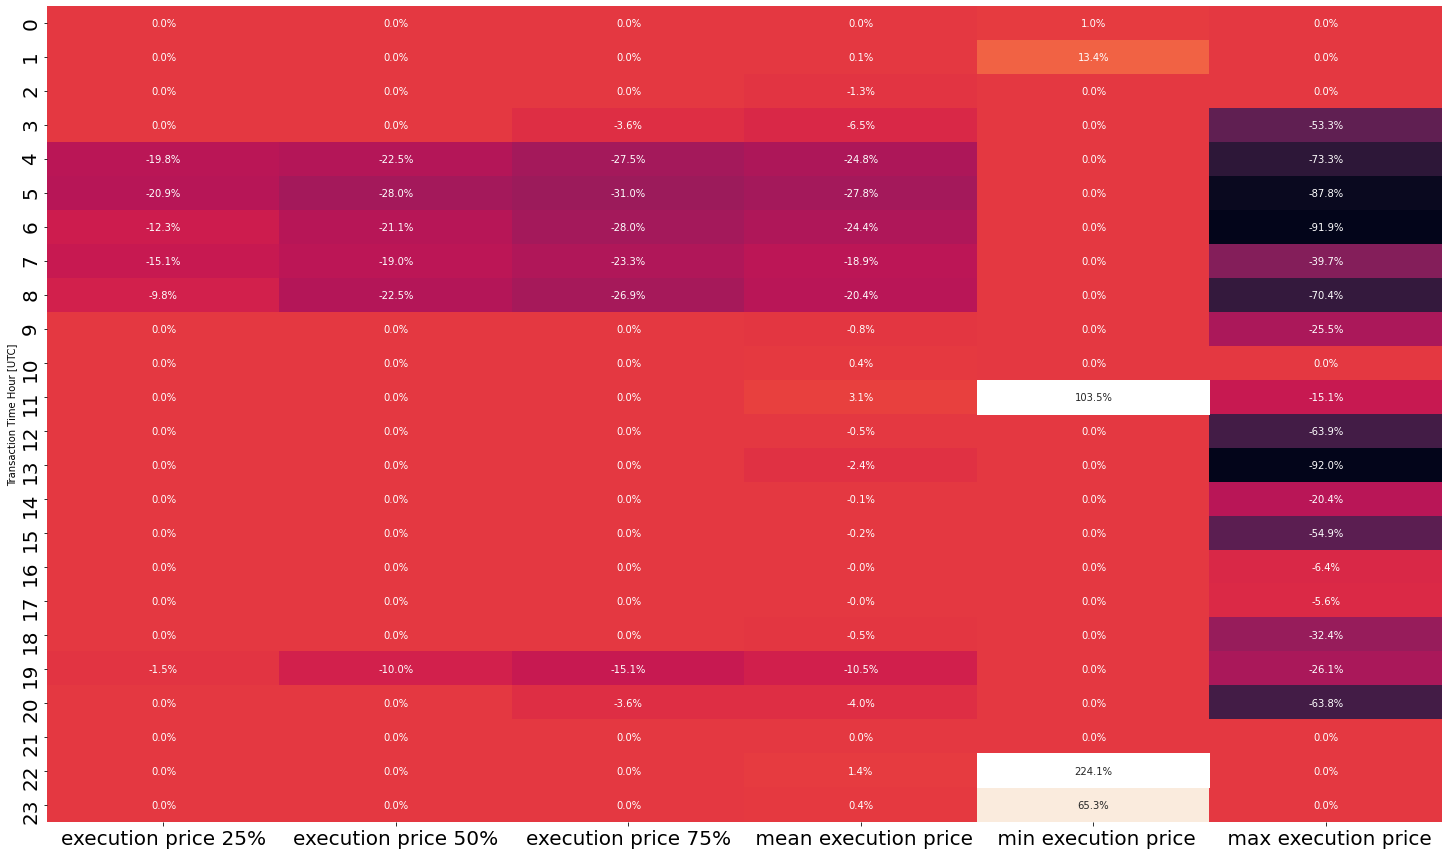

In [67]:
fig, ax = plt.subplots(figsize=(25, 15))
plot_data=(daily_execution_price_stat_marginal-daily_execution_price_stat)/abs(daily_execution_price_stat)
sbn.heatmap(plot_data,
           annot=True,
           fmt=".1%",
           cbar = False,
           mask=abs(plot_data) > 1)
cmap1 = mpl.colors.ListedColormap(['white'])
sbn.heatmap(plot_data, 
            mask=abs(plot_data) < 1,
            annot=True,
            fmt=".1%",
            cmap=cmap1,
            cbar=False)
ax.tick_params(axis='both', which='major', labelsize=20)

Visualize bid-ask spread for the whole day before and after hydro inclusion including both the maximum effect pumping and selling in the German market could have.

In [68]:
df_updated=update_prices_closed_transactions_complete(df, transactions_update)

In [69]:
starttime="23/04/2019 15:00"
df_validity=hourly_bid_ask_spread(df, starttime)

df_validity_update=hourly_bid_ask_spread(df_updated, starttime, comparison=True)

Hourly total bid ask spread is not strongly affected as it can be predicted. This is mainly due to the fact that the change in price in the window of time does not affect strongly the daily patterns. Additionally, it is important to consider that the overall bid-ask spread is not affected since the additional trading activity on the Swiss side on the German market can not be simulated and orders are assumed to be perfectly placed with minimal trading activity. This implies that the bid-ask spread is not strongly affected.

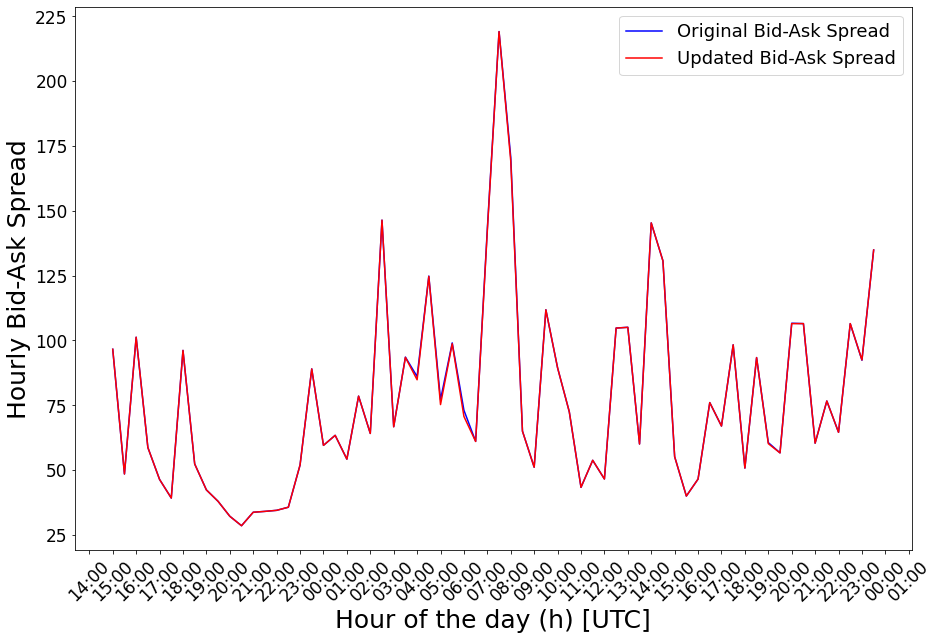

In [76]:
hourly_bid_ask_spread_plot_comparison(df_validity, df_validity_update)

Plotting the price in the time window of interest. It is possible to see how the pumping and selling price limits change the price evolution in time.

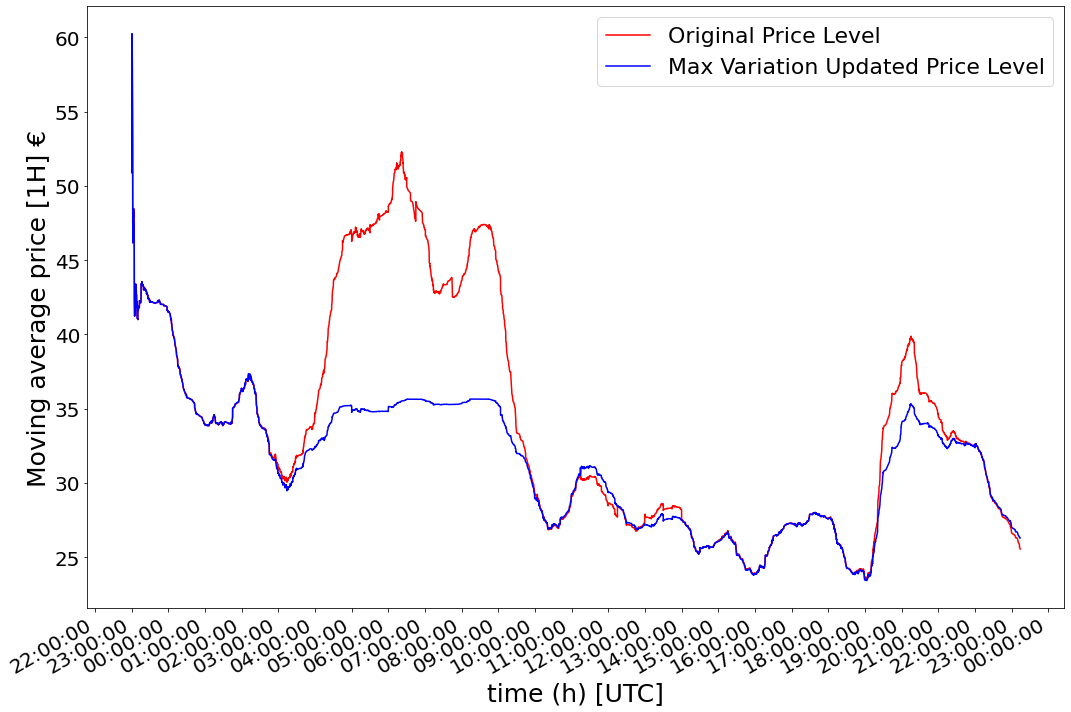

In [75]:
time, outputseries=executed_transactions_time_series(transactions_update, output_series_='moving_avg_exec_price_updated_transactions_comparison')



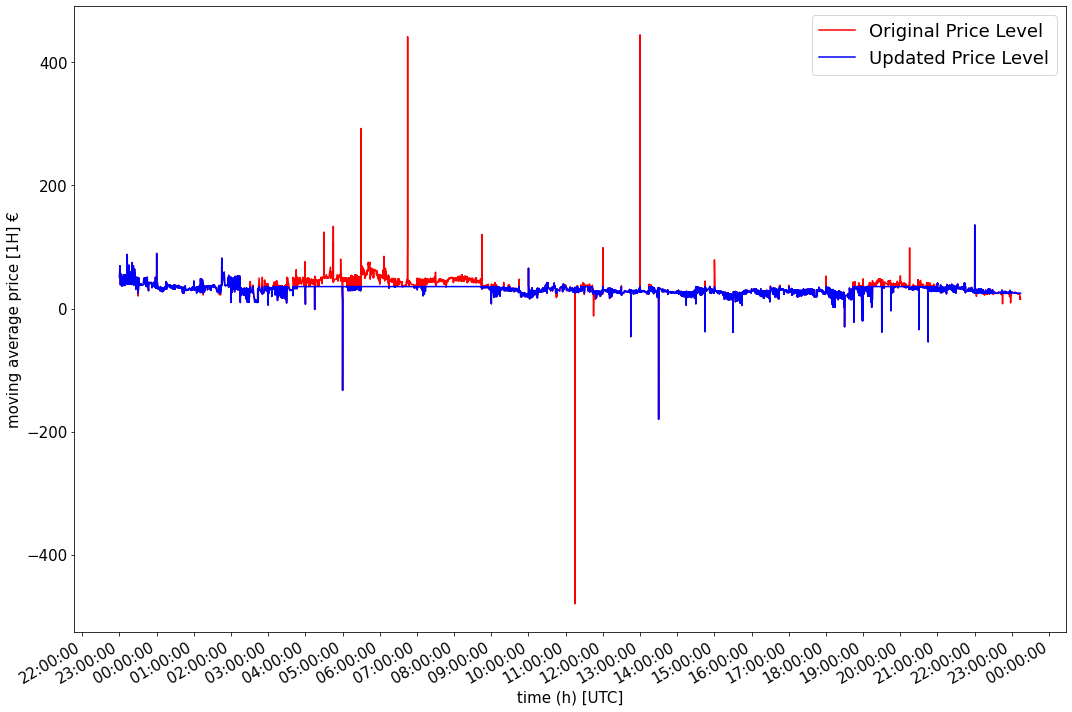

In [25]:
time, outputseries=executed_transactions_time_series(transactions_update, output_series_='exec_price_updated_transactions_comparison')

